   ## Tasmania Wave Converters - Data Set

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string
from sklearn.linear_model import LogisticRegression
import string
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

### Data cleaning and preperations

In [18]:
tasmania_df = pd.read_csv('Data_sets/Tasmania_Data.csv')

tasmania_df.columns = [f'X{i+1}' for i in range(16)] + [f'Y{i+1}' for i in range(16)] + [f'P{i+1}' for i in range(16)] + ['Power_all']

tasmania_df.head()


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,P8,P9,P10,P11,P12,P13,P14,P15,P16,Power_all
0,281.0669,390.3761,561.0742,295.9217,565.5344,236.3035,393.0648,340.0667,213.7463,457.8913,...,228315.9892,196579.4315,265924.2946,236228.4838,229197.3604,212649.9615,253153.4761,265363.3600,251322.8751,3810742.386
1,566.0000,566.0000,346.5334,202.2120,389.6777,277.7876,421.9610,260.3339,464.1620,566.0000,...,216919.6851,210539.3646,234470.2783,245953.6945,200980.6210,203164.4624,262784.1109,269371.6293,265446.7199,3745925.666
2,2.1045,352.3969,285.2965,566.0000,532.4306,176.8103,566.0000,0.0000,234.7225,485.8672,...,231355.4783,267915.4110,239599.8014,239349.6550,239027.6745,194421.2484,200775.3338,265827.1867,271780.8771,3781329.415
3,168.5854,550.6155,0.0000,566.0000,450.8427,0.0000,566.0000,566.0000,458.9008,227.8836,...,212278.2632,199341.9985,230549.7763,210669.8570,271101.8480,199967.8783,203943.1047,265087.0171,256492.7005,3667609.449
4,278.5785,365.0291,69.2200,216.9947,566.0000,301.4299,151.3832,566.0000,384.4588,322.3628,...,268466.9163,265857.5868,242668.5253,267390.9069,226106.6051,207986.8063,244762.5423,207071.1001,264608.5750,3751960.252


In [19]:
tasmania_df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,P8,P9,P10,P11,P12,P13,P14,P15,P16,Power_all
count,71999.000000,71999.000000,71999.000000,71999.000000,71999.000000,71999.000000,71999.000000,71999.000000,71999.000000,71999.000000,...,71999.000000,71999.000000,71999.000000,71999.000000,71999.000000,71999.000000,71999.000000,71999.000000,71999.000000,7.199900e+04
mean,300.331259,294.455437,289.068078,263.390922,307.689304,246.710611,278.578414,286.572733,276.478777,299.829485,...,232384.032157,235201.115988,239331.980809,235166.818700,234747.206701,233791.508560,235309.867518,238325.284397,236812.339489,3.760137e+06
std,191.472836,178.335205,180.894084,181.188277,192.544141,182.996380,182.148957,169.950718,179.503460,185.270575,...,28444.508021,29020.010182,28813.597754,28734.266364,28698.333219,28353.824899,28499.047384,28693.896083,28045.062638,1.121468e+05
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,129775.910100,138563.996300,126897.265500,133149.911400,128318.157900,131102.363200,134838.948900,135212.637500,128026.083200,3.235131e+06
25%,121.018450,137.408200,126.749450,104.923150,125.933750,75.863550,114.667200,143.875200,122.936800,132.516950,...,211195.652300,213104.070250,217771.899300,213165.867300,212845.069300,211829.765600,213769.697250,217257.203450,216086.683250,3.685864e+06
50%,316.563000,303.411200,301.648600,244.302900,336.152100,223.478000,264.081200,297.630900,261.175200,314.031600,...,233919.772500,236768.550900,245712.105300,237440.955600,237238.103100,236435.082900,237550.646600,242743.462400,240613.970700,3.755821e+06
75%,479.759200,447.732650,446.489050,427.197650,484.349750,407.300150,451.788550,420.964250,442.217600,471.066950,...,259325.849450,265307.623000,265738.647500,264954.456350,263739.954800,261343.416800,264541.812850,265748.753650,265161.691500,3.830820e+06
max,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,...,282143.804400,279824.753000,283548.559400,281457.365400,281789.422200,281968.795200,286279.149600,282189.733800,283875.584200,4.241838e+06


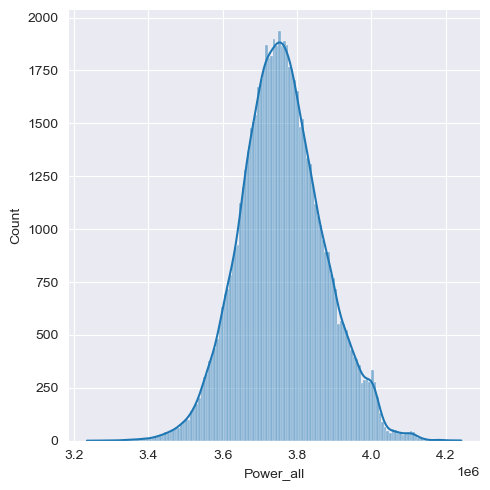

In [20]:
sns.displot(tasmania_df['Power_all'], kde=True)

In [21]:
# Usunięcie wszystkich kolumn Pi (P1 do P16)
columns_to_remove = [f"P{i}" for i in range(1, 17)]
tasmania_new_df = tasmania_df.drop(columns=columns_to_remove,errors='ignore')

tasmania_df= tasmania_new_df
print("Kolumny po usunięciu P1-P16:", tasmania_df.columns)

tasmania_df.head(10)

Kolumny po usunięciu P1-P16: Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'X12', 'X13', 'X14', 'X15', 'X16', 'Y1', 'Y2', 'Y3', 'Y4', 'Y5', 'Y6',
       'Y7', 'Y8', 'Y9', 'Y10', 'Y11', 'Y12', 'Y13', 'Y14', 'Y15', 'Y16',
       'Power_all'],
      dtype='object')


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,Y8,Y9,Y10,Y11,Y12,Y13,Y14,Y15,Y16,Power_all
0,281.0669,390.3761,561.0742,295.9217,565.5344,236.3035,393.0648,340.0667,213.7463,457.8913,...,280.6511,161.4952,566.0000,482.0172,382.3173,238.8000,317.0029,565.6895,402.5136,3810742.386
1,566.0000,566.0000,346.5334,202.2120,389.6777,277.7876,421.9610,260.3339,464.1620,566.0000,...,407.8036,0.0000,197.9584,330.1866,78.5412,0.0000,244.8564,566.0000,561.4139,3745925.666
2,2.1045,352.3969,285.2965,566.0000,532.4306,176.8103,566.0000,0.0000,234.7225,485.8672,...,338.2327,566.0000,194.1232,425.8882,378.0019,0.0000,55.7313,537.0604,548.1502,3781329.415
3,168.5854,550.6155,0.0000,566.0000,450.8427,0.0000,566.0000,566.0000,458.9008,227.8836,...,29.8520,0.0000,415.0838,386.2889,493.6863,155.1167,0.0000,566.0000,473.5197,3667609.449
4,278.5785,365.0291,69.2200,216.9947,566.0000,301.4299,151.3832,566.0000,384.4588,322.3628,...,155.0812,566.0000,288.3670,566.0000,97.2078,236.2970,494.7640,25.0674,566.0000,3751960.252
5,323.2491,403.0389,200.8609,566.0000,424.4761,145.0769,474.4625,337.6401,42.0066,143.4122,...,0.0000,367.2267,0.0000,566.0000,19.0696,419.4444,555.7474,566.0000,233.2983,3662247.324
6,91.8499,242.3228,566.0000,409.7025,566.0000,43.8506,439.6084,335.1521,0.0000,382.9714,...,566.0000,238.8212,345.0963,396.8807,566.0000,312.7215,566.0000,421.0035,398.6932,3852747.445
7,63.5375,157.2991,110.3393,566.0000,240.5417,120.2778,566.0000,428.1993,26.8499,470.7393,...,222.6650,473.6171,88.3648,566.0000,233.5088,162.2513,563.7272,546.9444,170.1143,3746908.210
8,0.0000,230.2228,305.5298,566.0000,566.0000,0.0000,333.1316,0.0000,12.3826,566.0000,...,425.0081,170.8292,256.4190,513.0666,362.9393,98.2645,16.5196,566.0000,566.0000,3784265.732
9,175.1450,125.4981,276.1250,338.3183,566.0000,255.7734,537.8375,0.0000,213.0610,223.0269,...,400.5184,327.8620,156.4244,165.4388,183.5606,315.4086,70.8530,537.8619,380.4551,3827263.362


In [22]:
has_nan = tasmania_df.isnull().values.any()
print("Nan:", has_nan)

tasmania_df = tasmania_df.dropna()
tasmania_df.isnull().any(axis=1)

Nan: False


0        False
1        False
2        False
3        False
4        False
         ...  
71994    False
71995    False
71996    False
71997    False
71998    False
Length: 71999, dtype: bool

### X,Y boxplots

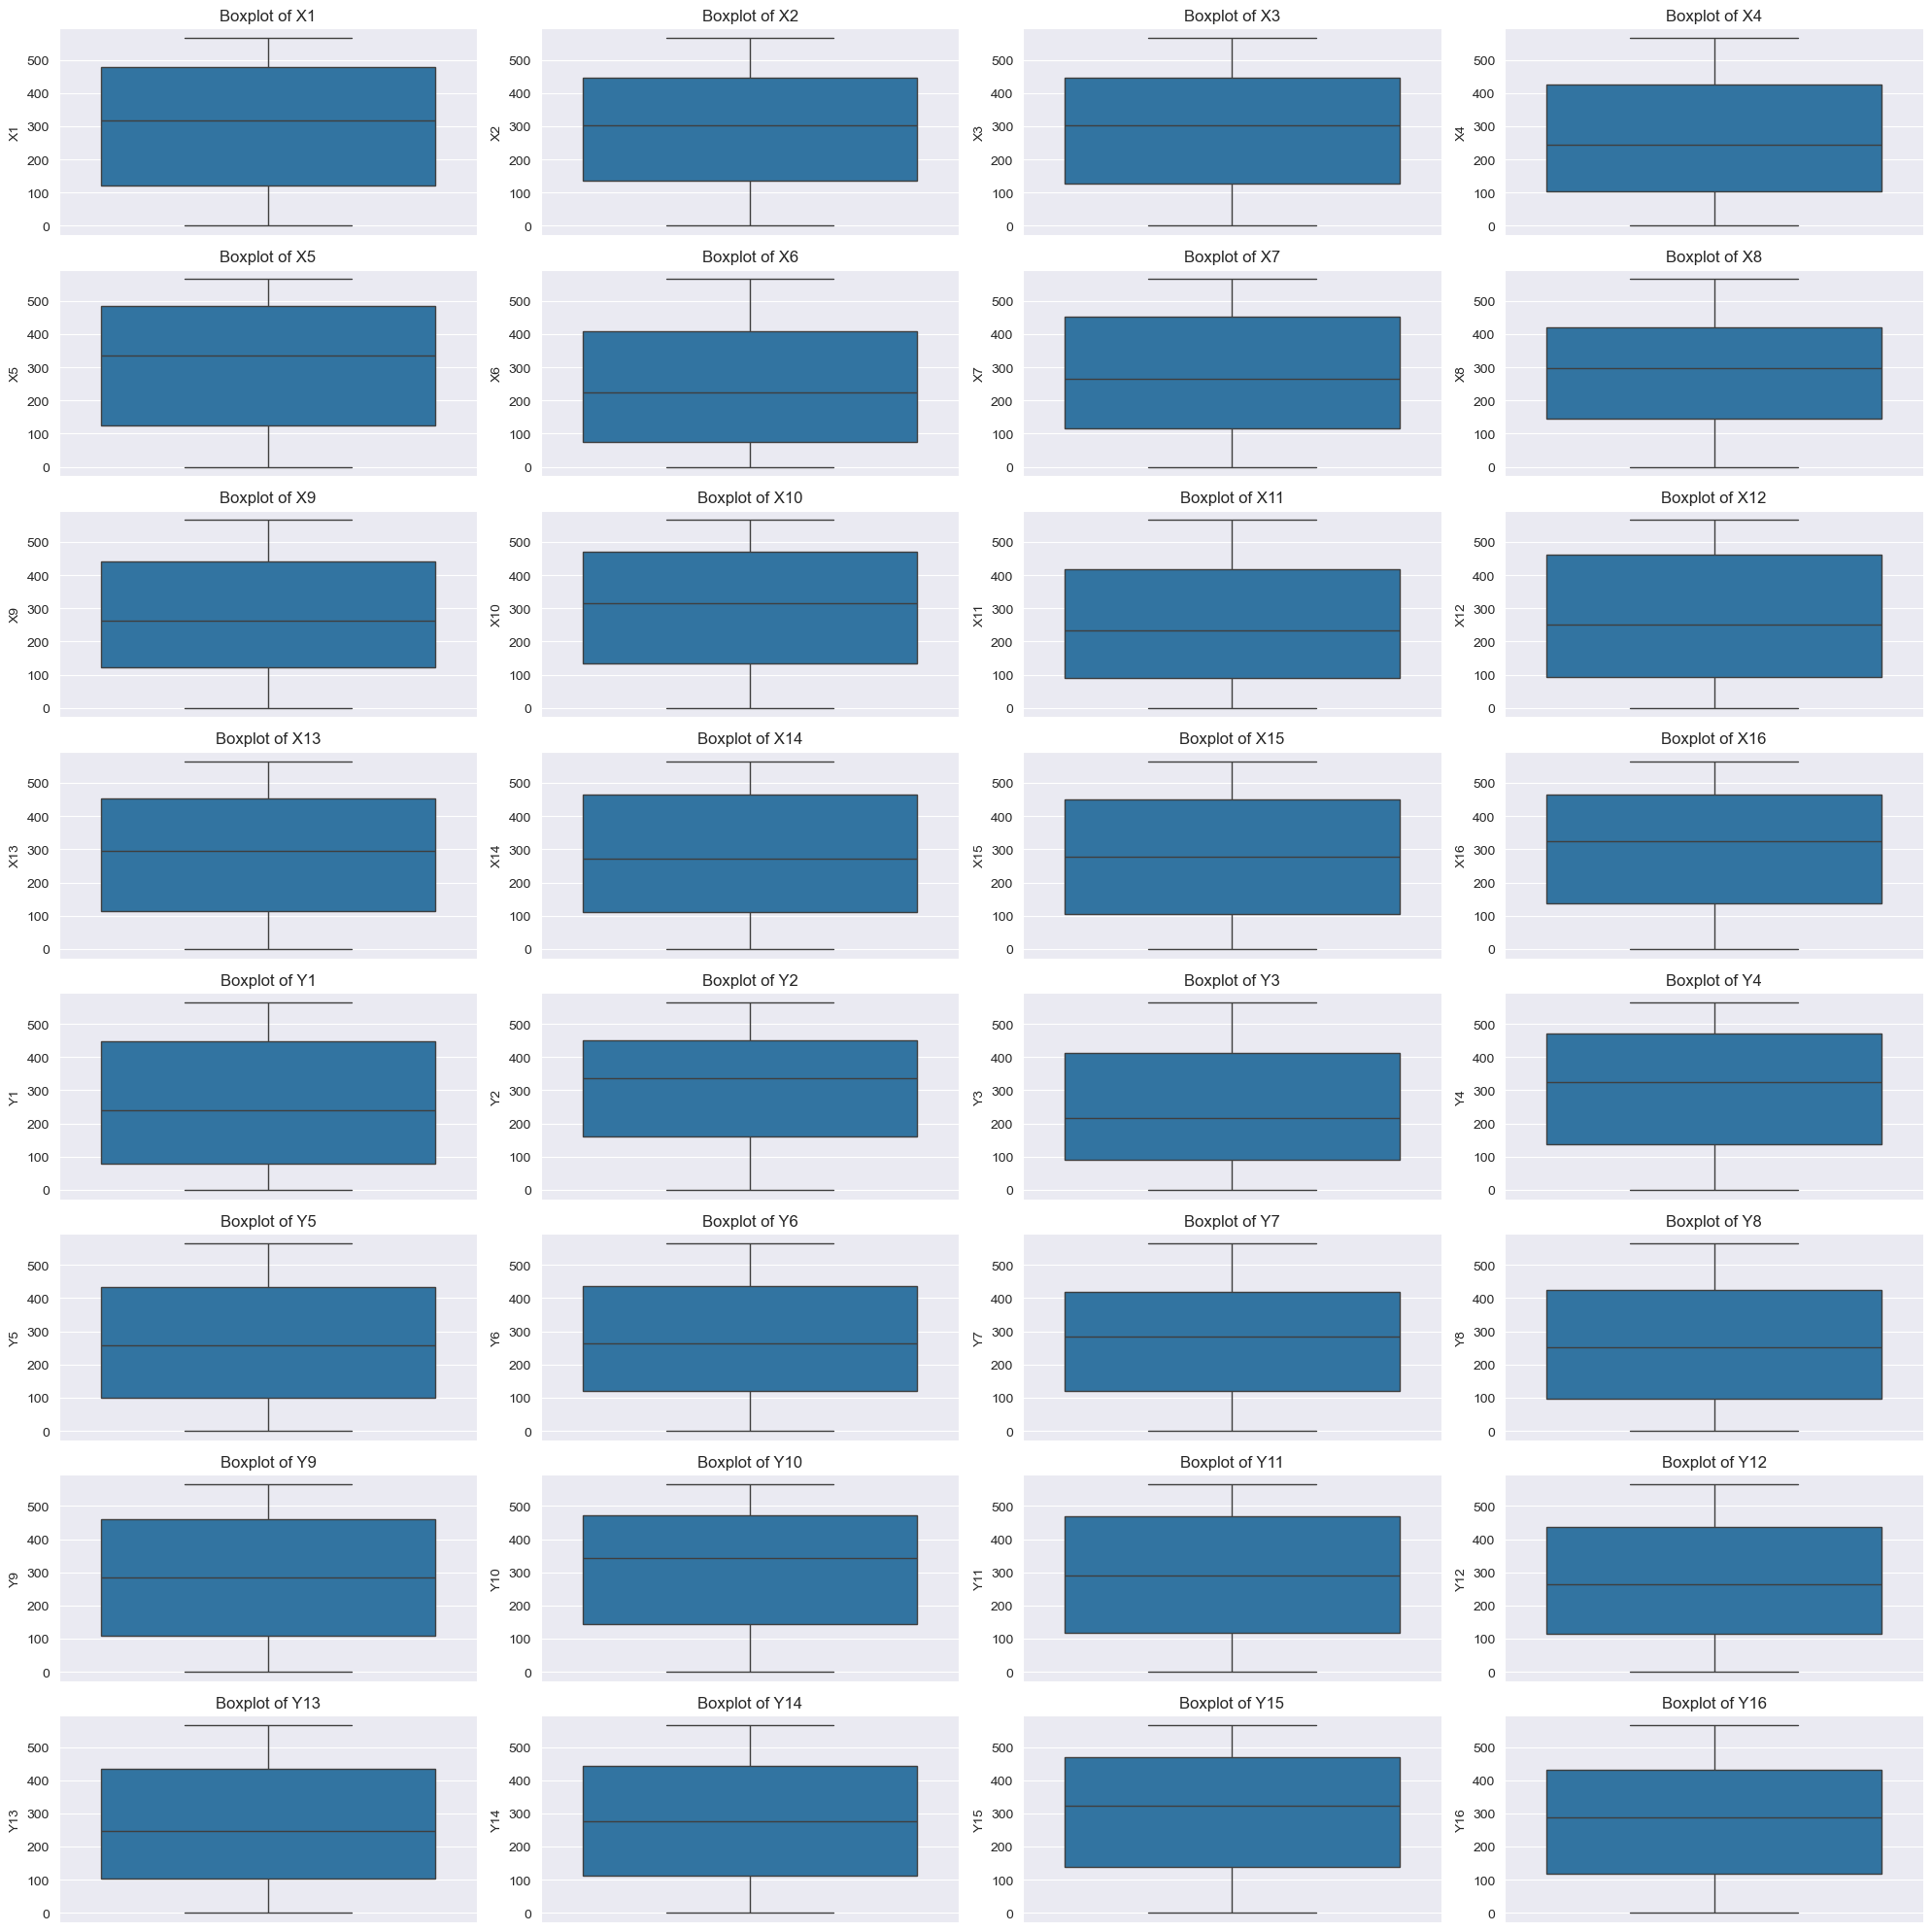

In [23]:
columns_to_plot = [f"X{i}" for i in range(1, 17)] + [f"Y{i}" for i in range(1, 17)]
plt.figure(figsize=(20, 20))
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(8, 4, i)
    sns.boxplot(y=tasmania_df[column])
    plt.title(f"Boxplot of {column}")
plt.tight_layout()
plt.show()

### "Power all" histogram and boxplot, which show us outliers that has to be removed

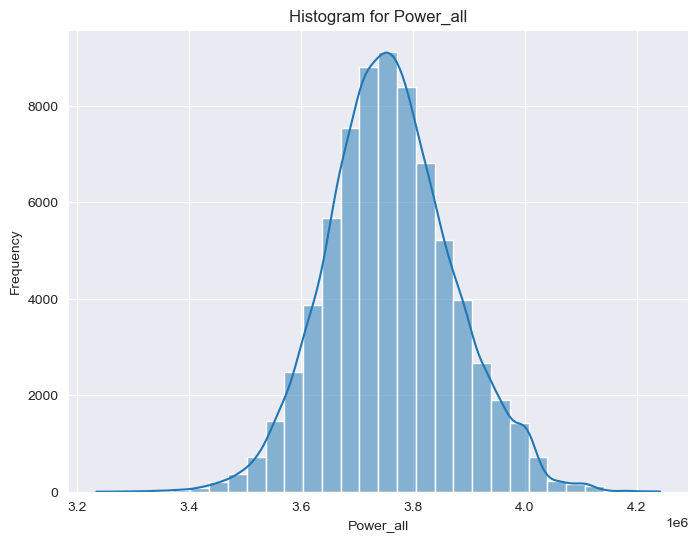

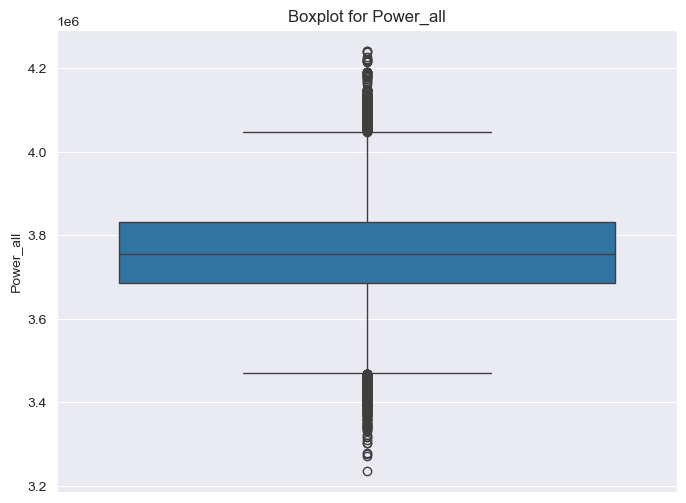

In [24]:
# Histogram dla kolumny Power_all


plt.figure(figsize=(8, 6))
sns.histplot(tasmania_df['Power_all'], kde=True, bins=30)
plt.title('Histogram for Power_all')
plt.xlabel('Power_all')
plt.ylabel('Frequency')
plt.show()

# Boxplot dla kolumny Power_all
plt.figure(figsize=(8, 6))
sns.boxplot(y=tasmania_df['Power_all'])
plt.title('Boxplot for Power_all')
plt.ylabel('Power_all')
plt.show()


In [25]:
upper_limit = tasmania_df['Power_all'].mean() + 3 * tasmania_df['Power_all'].std()
lower_limit = tasmania_df['Power_all'].mean() - 3 * tasmania_df['Power_all'].std()


print(upper_limit)
print(lower_limit)

final_df_new = tasmania_df.loc[(tasmania_df['Power_all'] < upper_limit) & (tasmania_df['Power_all'] > lower_limit)]


print("Liczba wierszy po filtracji:", len(final_df_new))
print("Oryginalna liczba wierszy:", len(tasmania_df))

tasmania_df = final_df_new


4096577.1704570074
3423696.6696083266
Liczba wierszy po filtracji: 71664
Oryginalna liczba wierszy: 71999


## Correlation Matrix Heatmap to check relations between columns

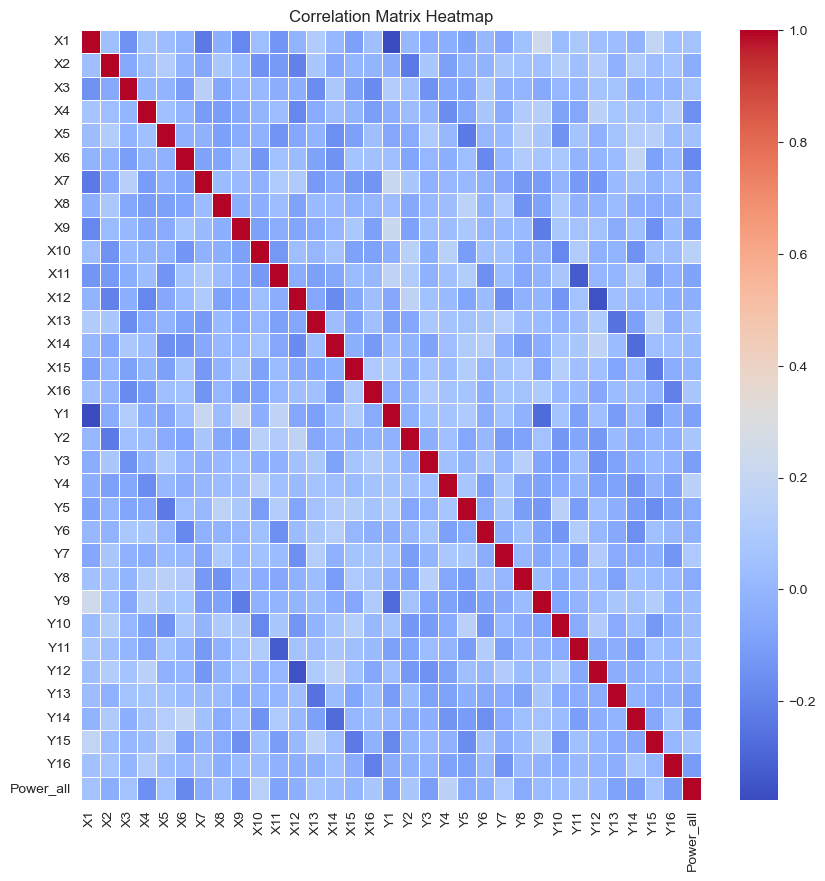

In [26]:
correlation_matrix = tasmania_df.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

(array([ 2.,  2.,  0.,  2.,  0.,  0.,  0.,  4.,  2.,  0.,  8.,  2.,  4.,
         8.,  4., 14., 20., 20., 20., 36., 42., 42., 52., 56., 62., 44.,
        90., 62., 76., 66., 68., 58., 36., 40., 24., 32., 18., 14.,  8.,
         8.,  4.,  0.,  2.,  2.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 33.]),
 array([-0.37659465, -0.3628287 , -0.34906276, -0.33529681, -0.32153086,
        -0.30776492, -0.29399897, -0.28023302, -0.26646708, -0.25270113,
        -0.23893518, -0.22516924, -0.21140329, -0.19763734, -0.1838714 ,
        -0.17010545, -0.1563395 , -0.14257356, -0.12880761, -0.11504167,
        -0.10127572, -0.08750977, -0.07374383, -0.05997788, -0.04621193,
        -0.03244599, -0.01868004, -0.00491409,  0.00885185,  0.022617

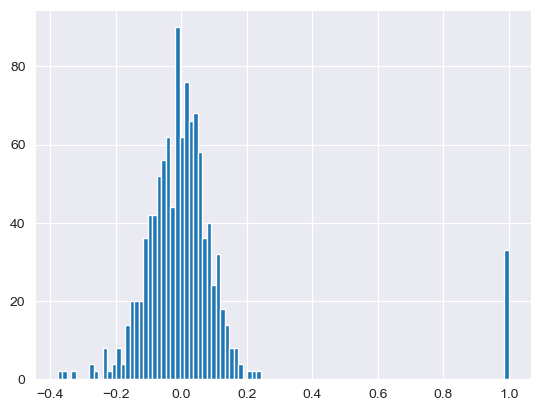

In [27]:
tab=np.array(correlation_matrix).reshape(-1)
plt.hist(tab, bins=100)

# Model Training
### Data split into train, test and validation sets

In [28]:
# Przygotowanie cech (X) i etykiety (y)
X = tasmania_df[[f"X{i}" for i in range(1, 17)] + [f"Y{i}" for i in range(1, 17)]]
y = tasmania_df["Power_all"]

# Podział na zestawy train, validation i test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)  # 70% train, 30% temp
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)  # 15% val, 15% test

# Informacja o rozmiarach zbiorów
print(f"Train set: {X_train.shape[0]} samples")
print(f"Validation set: {X_val.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")

Train set: 57331 samples
Validation set: 7166 samples
Test set: 7167 samples


### Linear Regression

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Funkcja do obliczania MSE i RMSE
def calculate_rmse(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    return mse, rmse

# Model: Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

# Przewidywania na zbiorze walidacyjnym
y_val_pred_lr = lr.predict(X_val)

# Obliczanie MSE, RMSE dla walidacji
mse_val, rmse_val = calculate_rmse(y_val, y_val_pred_lr)

# Obliczanie współczynnika determinacji R² dla walidacji
r2_val = lr.score(X_val, y_val)

# Przewidywania na zbiorze testowym
y_test_pred_lr = lr.predict(X_test)

# Obliczanie MSE, RMSE dla testu
mse_test, rmse_test1 = calculate_rmse(y_test, y_test_pred_lr)

# Obliczanie współczynnika determinacji R² dla testu
r2_test = lr.score(X_test, y_test)

# Wyświetlanie wyników dla walidacji i testu
print(f"Validation set - MSE: {mse_val}, RMSE: {rmse_val}, R²: {r2_val}")
print(f"Test set - MSE: {mse_test}, RMSE: {rmse_test1}, R²: {r2_test}")

# Validation set - MSE: 10225729256.147285, RMSE: 101122.34795606403, R²: 0.1471274927649754
# Test set - MSE: 10301867321.186537, RMSE: 101498.11486518623, R²: 0.1490122371830599


Validation set - MSE: 10225729256.147285, RMSE: 101122.34795606403, R²: 0.1471274927649754
Test set - MSE: 10301867321.186537, RMSE: 101498.11486518623, R²: 0.1490122371830599


### Gradient Boosting

In [31]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Definicja hiperparametrów do przetestowania
param_grid = {
    'n_estimators': [100, 200],  # Zmniejszono do dwóch wartości
    'max_depth': [3, 5],  # Zmniejszono do dwóch wartości
    'learning_rate': [0.1, 0.2]  # Zmniejszono do dwóch wartości
}

# Tworzenie modelu Gradient Boosting
model = GradientBoostingRegressor(random_state=42)

# Grid Search z walidacją krzyżową
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',  # używamy MSE jako funkcji kosztu
    cv=3,  # liczba podziałów do walidacji krzyżowej
    verbose=1,
    n_jobs=-1  # równoległe przetwarzanie
)

# Dopasowanie modelu do danych treningowych
grid_search.fit(X_train, y_train)

# Najlepszy model i jego hiperparametry
best_model = grid_search.best_estimator_
print("Najlepsze hiperparametry:", grid_search.best_params_)

# Ocena na zbiorze walidacyjnym
y_val_pred = best_model.predict(X_val)

# Obliczanie MSE, RMSE i R² dla walidacji
mse = mean_squared_error(y_val, y_val_pred)
rmse_gb = np.sqrt(mse)
r2_gb = r2_score(y_val, y_val_pred)

# Wyświetlanie wyników dla walidacji
print(f"Gradient Boosting (Validation) - MSE: {mse}, RMSE: {rmse_gb}, R²: {r2_gb}")

# Ocena na zbiorze testowym
y_test_pred = best_model.predict(X_test)

# Obliczanie MSE, RMSE i R² dla testu
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test2 = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)

# Wyświetlanie wyników dla testu
print(f"Gradient Boosting (Test) - MSE: {mse_test}, RMSE: {rmse_test2}, R²: {r2_test}")

# Najlepsze hiperparametry: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200}
# Gradient Boosting (Validation) - MSE: 2668434641.398491, RMSE: 51656.89345477998, R²: 0.7774403677239756
# Gradient Boosting (Test) - MSE: 2596778565.992741, RMSE: 50958.59658578463, R²: 0.7854925992047601



Fitting 3 folds for each of 8 candidates, totalling 24 fits
Najlepsze hiperparametry: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200}
Gradient Boosting (Validation) - MSE: 2668434641.398491, RMSE: 51656.89345477998, R²: 0.7774403677239756
Gradient Boosting (Test) - MSE: 2596778565.992741, RMSE: 50958.59658578463, R²: 0.7854925992047601


### Xgboost

Fitting 3 folds for each of 8 candidates, totalling 24 fits
Najlepsze hiperparametry: {'n_estimators': 200, 'max_depth': 10, 'learning_rate': 0.1}
XGBoost (Validation) - MSE: 2667123498.464898, RMSE: 51644.2010148758, R²: 0.777549723030879
XGBoost (Test) - MSE: 2601461014.004996, RMSE: 51004.519544889314, R²: 0.7851058046718641


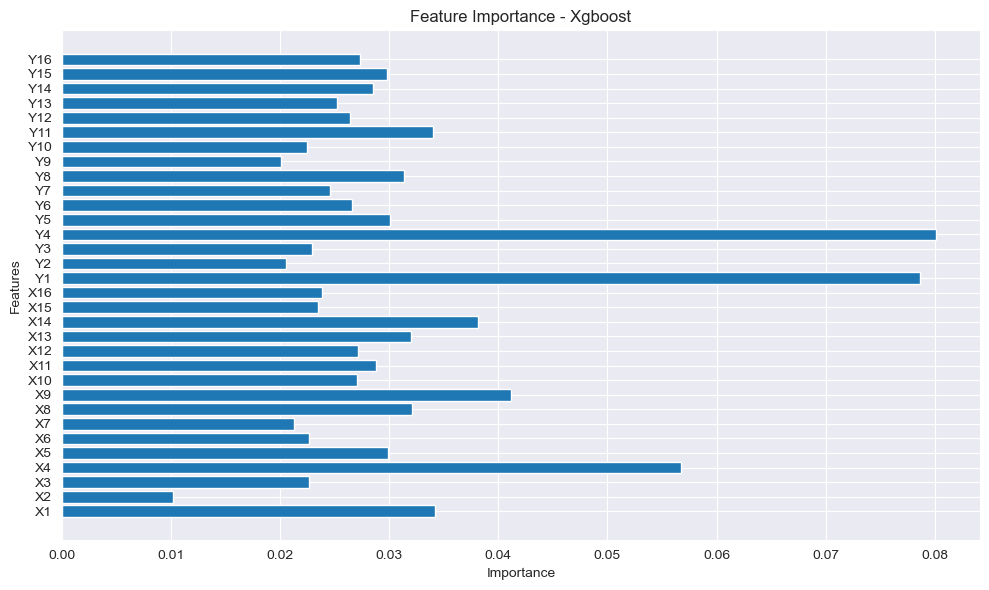

In [32]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import RandomizedSearchCV

# Definicja ograniczonej przestrzeni hiperparametrów
param_dist = {
    'n_estimators': [100, 200],  # Liczba drzew
    'max_depth': [5, 10],  # Maksymalna głębokość drzewa
    'learning_rate': [0.05, 0.1]  # Szybkość uczenia
}

# Tworzenie modelu XGBoost
model = xgb.XGBRegressor(random_state=42)

# RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=8,  # Liczba losowych kombinacji do przetestowania
    scoring='neg_mean_squared_error',  # Funkcja kosztu
    cv=3,  # Liczba podziałów do walidacji krzyżowej
    verbose=2,
    random_state=42,
    n_jobs=-1  # Użycie wszystkich rdzeni procesora
)

# Dopasowanie RandomizedSearchCV
random_search.fit(X_train, y_train)

# Najlepszy model i hiperparametry
best_xgb = random_search.best_estimator_
print("Najlepsze hiperparametry:", random_search.best_params_)

# Ocena na zbiorze walidacyjnym
y_val_pred = best_xgb.predict(X_val)
mse_val = mean_squared_error(y_val, y_val_pred)
rmse_val = np.sqrt(mse_val)
r2_val = r2_score(y_val, y_val_pred)

print(f"XGBoost (Validation) - MSE: {mse_val}, RMSE: {rmse_val}, R²: {r2_val}")

# Ocena najlepszego modelu na zbiorze testowym
y_test_pred = best_xgb.predict(X_test)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test3 = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)

print(f"XGBoost (Test) - MSE: {mse_test}, RMSE: {rmse_test3}, R²: {r2_test}")

# Feature Importance
feature_importance = best_xgb.feature_importances_
feature_names = X_train.columns

# Wizualizacja Feature Importance
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importance)
plt.title("Feature Importance - Xgboost")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

# Najlepsze hiperparametry: {'n_estimators': 200, 'max_depth': 10, 'learning_rate': 0.1}
# XGBoost (Validation) - MSE: 2667123498.464898, RMSE: 51644.2010148758, R²: 0.777549723030879
# XGBoost (Test) - MSE: 2601461014.004996, RMSE: 51004.519544889314, R²: 0.7851058046718641

### LightGBM

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.024358 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8160
[LightGBM] [Info] Number of data points in the train set: 57331, number of used features: 32
[LightGBM] [Info] Start training from score 3759594.907031
Najlepsze hiperparametry: {'num_leaves': 31, 'n_estimators': 200, 'max_depth': 10, 'learning_rate': 0.1}
LightGBM (Validation) - MSE: 2695561557.5818105, RMSE: 51918.79772858584, R²: 0.7751778590618268
LightGBM (Test) - MSE: 2674600876.4445233, RMSE: 51716.54354695916, R²: 0.779064072045183


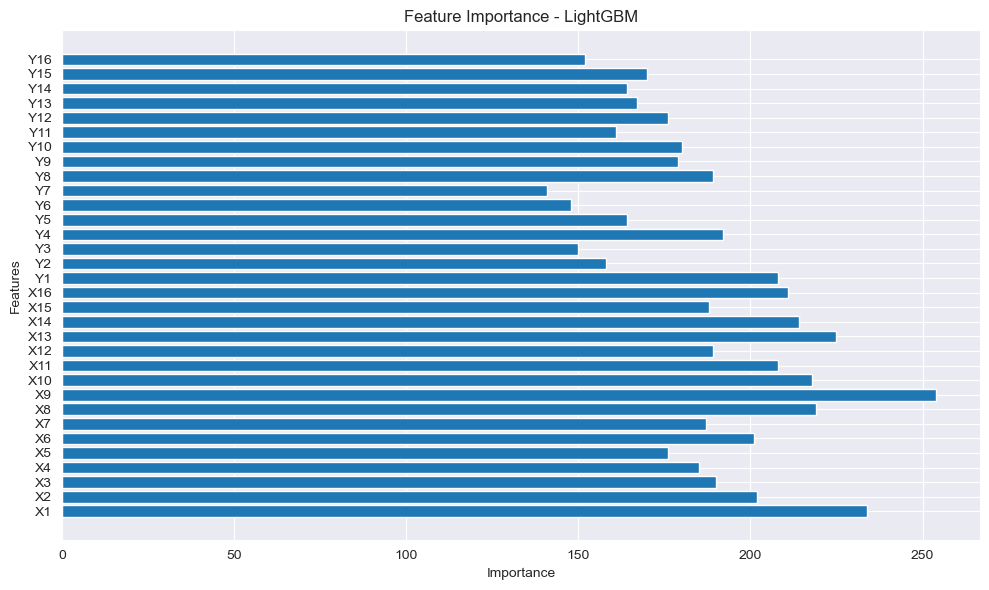

In [33]:
import lightgbm as lgb
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import RandomizedSearchCV

# Definicja ograniczonej przestrzeni hiperparametrów
param_dist = {
    'n_estimators': [100, 200],  # Liczba drzew
    'max_depth': [5, 10],  # Maksymalna głębokość drzewa
    'learning_rate': [0.05, 0.1],  # Szybkość uczenia
    'num_leaves': [31, 50],  # Liczba liści w każdym drzewie
}

# Tworzenie modelu LightGBM
model = lgb.LGBMRegressor(random_state=42)

# RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=8,  # Liczba losowych kombinacji do przetestowania
    scoring='neg_mean_squared_error',  # Funkcja kosztu
    cv=3,  # Liczba podziałów do walidacji krzyżowej
    verbose=2,
    random_state=42,
    n_jobs=-1  # Użycie wszystkich rdzeni procesora
)

# Dopasowanie RandomizedSearchCV
random_search.fit(X_train, y_train)

# Najlepszy model i hiperparametry
best_lgbm = random_search.best_estimator_
print("Najlepsze hiperparametry:", random_search.best_params_)

# Ocena na zbiorze walidacyjnym
y_val_pred = best_lgbm.predict(X_val)
mse_val = mean_squared_error(y_val, y_val_pred)
rmse_val = np.sqrt(mse_val)
r2_val = r2_score(y_val, y_val_pred)

print(f"LightGBM (Validation) - MSE: {mse_val}, RMSE: {rmse_val}, R²: {r2_val}")

# Ocena najlepszego modelu na zbiorze testowym
y_test_pred = best_lgbm.predict(X_test)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test4 = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)

print(f"LightGBM (Test) - MSE: {mse_test}, RMSE: {rmse_test4}, R²: {r2_test}")

# Najlepsze hiperparametry: {'num_leaves': 31, 'n_estimators': 200, 'max_depth': 10, 'learning_rate': 0.1}
# LightGBM (Validation) - MSE: 379831678.9492799, RMSE: 19489.270867564028, R²: 0.8539457728751556
# LightGBM (Test) - MSE: 371742144.6858012, RMSE: 19280.61577558666, R²: 0.8603300208644927

# Feature Importance
feature_importance = best_lgbm.feature_importances_
feature_names = X_train.columns

# Wizualizacja Feature Importance
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importance)
plt.title("Feature Importance - LightGBM")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

# Najlepsze hiperparametry: {'num_leaves': 31, 'n_estimators': 200, 'max_depth': 10, 'learning_rate': 0.1}
# LightGBM (Validation) - MSE: 2695561557.5818105, RMSE: 51918.79772858584, R²: 0.7751778590618268
# LightGBM (Test) - MSE: 2674600876.4445233, RMSE: 51716.54354695916, R²: 0.779064072045183

### Best model is:

In [34]:
model_performance = {
    "Linear Regression": rmse_test1,
    "Gradient Boosting": rmse_test2,
    "XGBoost": rmse_test3,
    "LGBM": rmse_test4

}

#Wybieramy najlepszy model
best_model_name = min(model_performance, key=model_performance.get)
print(f"Best model based on validation RMSE: {best_model_name}")

Best model based on validation RMSE: Gradient Boosting
